<a href="https://colab.research.google.com/github/KamranRiyaz/MachineLearning-Using-Python/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Using reshape function from the numpy lilraray we need to convert the dependent variable vector 'y' into a 2-D array as the standardscaler() expects a 2-D numpy array as an input

In [7]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [11]:
y = y.reshape(len(y))
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Training the SVR model on the whole dataset

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # use radial basis function kernel for svr
regressor.fit(X,y)

SVR()

## Predicting a new result

In [14]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

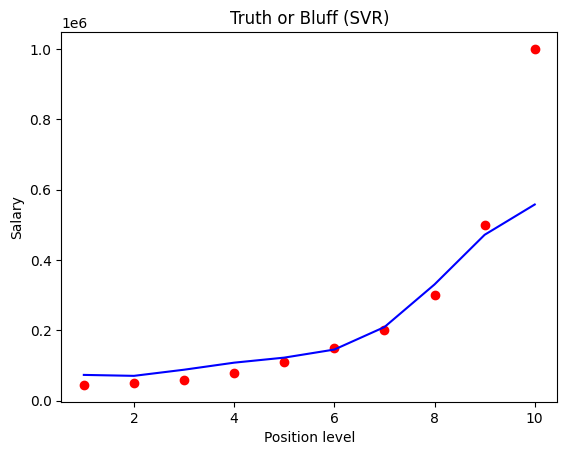

In [15]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(len(y),1)), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-16-9d19a296317c>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.001)


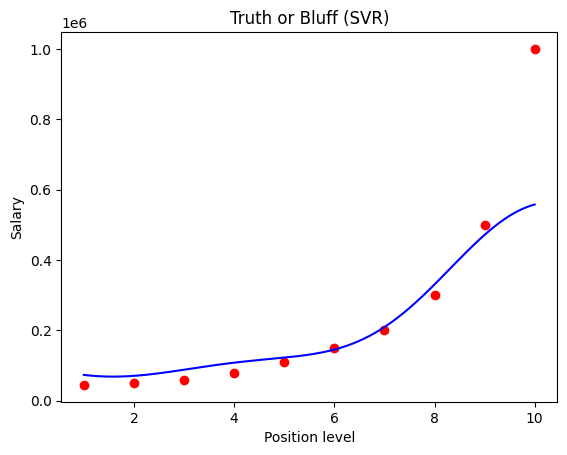

In [16]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.001)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(len(y),1)), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()